# Mathematics behind amortized loans

#### Example 1
    
Jim wants to borrow $P_1$ from the bank. He takes an amortized loan with monthly interest rate of $r$ and agrees to make 3 payments $A$ so that he repays the loan in 3 months.

Payment schedule:

|  Month  | Principal | Interest |  Payoff  |
|---------|-----------|----------|----------|
|    1    |   $P_1$   |  $P_1r$  |    A     |
|    2    |   $P_2$   |  $P_2r$  |    A     |
|    3    |   $P_3$   |  $P_3r$  |    A     |
|    4    |   $P_4$   |    0     |    0     |

where $P_1 \ge P_2 \ge P_3 \ge P_4$.

Derivation:

After the first month Jim ows the interest on the initial principal $P_1 r$ so he makes a payment of $A$ which payes the interest and, the leftover, reduces the outstanding principal. The new principal $P_2$ is than
    
$$ P_2 = P_1 r - A.$$

After the second month Jim owns the interest on the outstanding interest $P_2$ which is $P_2 r$ and makes another payment $A$. This further reduces his outstanding principal which becomes

$$P_3 = P_2r - A = (P_1 r - A)r - A.$$

Finally, after the third month Jim makes the final payment $A$ and pays off the interest on the remaining principal and the loan

$$ P_4 = P_3 r - A = ((P_2 r - A)r - A) = (((P_1r - A) r - A)r - A).$$

After the final payment the principal is zero $P_4 = 0$ and $P_1$ is knows. From the generalized form of the above equation we find

$$ A = P \frac{r}{1 - \left( \frac{1}{1 + r} \right)^T}, \qquad (1)$$
$$ A = P \, \xi(r, T), \qquad $$

where the symbols denote

* monthly payment $A$
* loan principal $P$
* monthly interest rate $r$
* loan term $T$ in months.

For more detailed derivation see [Wikipedia](https://en.wikipedia.org/wiki/Amortization_calculator).

---

#### Example 2A

Sue wants to borrow 1,000 SEK from the bank with 5% annual interest rate and agrees to repay the loan in 1 year. 

Parameters:
- `p = 1000`
- `r = 0.05`
- `T = 1`

In [1]:
from loan_model import get_payment

In [2]:
p, r, T = 1_000, 0.04, 1

In [3]:
A = get_payment(p, r, T)

In [4]:
print(f"Monthly payment: {A:.2f} SEK ({A/p:.2%} of P)")

Monthly payment: 85.15 SEK (8.51% of P)


In [5]:
print(f"Total: {12 * T * A:.2f} SEK ({12 * T * A/p:.2%} of P)")

Total: 1021.80 SEK (102.18% of P)


The monthly income, for the bank,

$$\frac{85.15}{1,000.00} = 8.51\% ,$$

and the neto return for the bank is

$$\eta = \frac{1,021.80-1,000.00}{1,000.00} = 2.18\% ,$$

and is **less than the annual interest rate 5.00%, on which Sue borrowed, because the principal of an amortized loan is strictly decreasing.**

---

#### Example 2B

However, what happens if Sue borrowed the money for 10 years?

Parameters:
- `P = 1000`
- `r = 0.05`
- `T = 10`

In [6]:
p, r, T = 1_000, 0.04, 10

In [7]:
A = get_payment(p, r, T)

In [8]:
print(f"Monthly payment: {A:.2f} SEK ({A/p:.2%} of P)")

Monthly payment: 10.12 SEK (1.01% of P)


In [9]:
print(f"Total: {12 * T * A:.2f} SEK ({12 * T * A/p:.2%} of P)")

Total: 1214.94 SEK (121.49% of P)


The monthly income, for the bank,

$$\frac{10.12}{1,000.00} = 1.01\% $$

and the neto return for the bank is

$$\eta = \frac{1,214.94-1,000.00}{1,000.00} = 21.49\% .$$

In this scenario, **the monthly payment is lower than in the previous scenario but the neto return for the bank is much higher.**

---

### Dynamics of Amortized Loans

Amortized loans are payed off with monthly payments $A$ that compose of

- interest payments $ I $
- amortization $ A^\prime $ is the part that reduces the outsdanding principal

meaning that we can write

$$ A = I + A^\prime .$$

#### Example 3

Consider a millennial Svensson family that wants to take on a mortgage to borrow 2 500 000 SEK for 30 years assuming that the family gets 4.5% interest rate.

Parameters:
- `P = 2500000`
- `r = 0.045`
- `T = 30`

In [10]:
p, r, T = 2_500_000, 0.045, 30

In [11]:
A = get_payment(p, r, T)

In [12]:
print(f"Monthly payment: {A:.2f} SEK ({A/p:.2%} of P)")

Monthly payment: 12667.13 SEK (0.51% of P)


Visualisation:

In [13]:
from plotting import plot_loan_dynamics

Principal: 2,500,000 SEK; Interest rate: 4.50%; Term: 30 Y => 82.41%


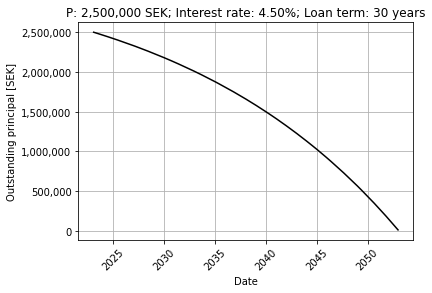

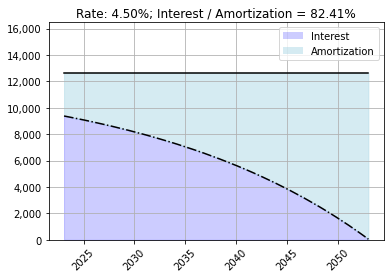

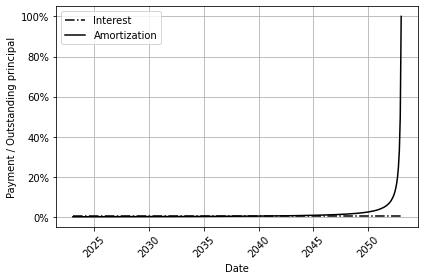

In [14]:
plot_loan_dynamics(p, r, T)

How much would the Svenssons be paying for the same mortgage if their interest rates were 3% or 6%? 

Parameters:
- `P = 2500000`
- `r1 = 0.030`, `r2 = 0.045`, `r3 = 0.060`
- `T = 30`

| Principal [SEK] | Rate [%/Y]          | Term [Y] | $\eta$ [%] | $I/A$ [%] |
|-----------------|---------------------|----------|------------|-----------|
| 2 500 000       | 3.0                 | 30       |  51.78     |  51.78    |
| 2 500 000       | 4.5                 | 30       |  82.41     |  82.41    |
| 2 500 000       | 6.0                 | 30       | 115.84     | 115.84    |

Observe $ \eta = \frac{I}{A} $ which implies that **the neto return for the borrower is the payed interest.**

How much would the Svenssons pay if they decied to pay off the loan, with the original parameters, in 10 or 20 years instead? 

Parameters:
- `P = 2500000`
- `r = 0.045`
- `T1 = 10`, `T2 = 20`, `T3 = 30`

| Principal [SEK] | Rate [%/Y]          | Term [Y] | $\eta$ [%] | $I/A$ [%] |
|-----------------|---------------------|----------|------------|-----------|
| 2 500 000       | 4.5                 | 10       | 24.37      | 24.37     |
| 2 500 000       | 4.5                 | 20       | 51.84      | 51.84     |
| 2 500 000       | 4.5                 | 30       | 82.41      | 82.41     |

### Time Value of Money

Consider the same scenario in which the Svenssons what to borrow 2 500 000 SEK with interest rate 4.5% and they can choose either loan terms of 10, 20 or 30 years. Assume that money markets offer a flat continuously-compounded rate of 1.5% over the same period. How does this affect the valuation of future cash flows?

Parameters:
- `P = 2500000`
- `r = 0.045`
- `T1 = 10`, `T2 = 20`, `T3 = 30`
- `rf = 0.015`

| Principal [SEK] | Rate [%/Y]          | Term [Y] | $\eta$ [%] | $I/A$ [%] |
|-----------------|---------------------|----------|------------|-----------|
| 2 500 000       | 4.5                 | 10       | 15.41      | 25.06     |
| 2 500 000       | 4.5                 | 20       | 31.09      | 55.26     |
| 2 500 000       | 4.5                 | 30       | 46.80      | 91.69     |

---

### Conclusion

What can we do with this information?

#### Planning ahead

From the three parameters that describe an amortized loan

- loan principal $P$
- monthly interest rate $r$
- loan term $T$

we have direct control over $p$ and $T$ and indirect control over $r$ (i.e., for a choose $T$ bank offers $r$).

### How does the neto return change with respect to the loan term?

#### Analytical solution

The neto return $\Sigma$ is defined as the sum of all monthly payments $A$ scaled by the initial principle $P$

$$ \Sigma = \frac{A \, T}{P}, \qquad (2)$$

where $T$ is the total number of months during the loan term. We find the change of neto return by substituting (1) in (2) we get

$$ \frac{\mathrm{d}\Sigma}{\mathrm{d}T} = r \frac{\mathrm{d}}{\mathrm{d}T} \frac{T}{1 - \left( \frac{1}{1 + r} \right)^T},$$

$$\frac{\mathrm{d}\Sigma}{\mathrm{d}T} = r \frac{1 - \left( \frac{1}{1 + r}\right)^T \left(1 - T \ln \left( \frac{1}{1 + r} \right)\right)}{\left( 1 - \left( \frac{1}{1 + r} \right)^T \right)^2}.$$

#### Numerical solution

Consider three rates:

- `r = 2.00%`
- `r = 4.00%`
- `r = 6.00%`

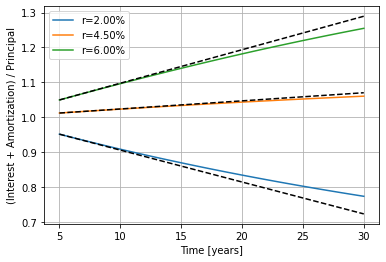

In [18]:
from plotting import plot_total_payment_wrt_time

plot_total_payment_wrt_time([0.02, 0.045, 0.06],0.04)

Dashed lines (--) are tangents on the curves at the first point ($T = 5$ years). Because tangents are linear functions they make it visually obvious that the neto return has a non-linear growth with increasing loan term `T`. **This is particullarly important to keep in mind when planning personal finances.**

From the lenders perspective it is useful to discount the future cash flow from the amortized loan with a flat continuously-compounded discount rate to approximate for the time value of money. To illustrate this we discount the results from the above graph with discount rate `rf = 4%`.

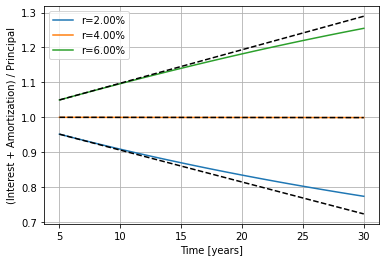

In [16]:
plot_total_payment_wrt_time([0.02, 0.04, 0.06], rf=0.04)

In this scenario, from the lenders perspective, the lender is losing money when they lend at interest rate `r=2%`.

------

### Components of the amortized loan